# Wine Clustering

**Data Source:** [Kaggle] https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

**Citation:** Aeberhard, S. & Forina, M. (1992). Wine [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RANDOM_SEED = 42
DATA_PATH = './data/wine-clustering.csv'

### Load Wine Dataset

In [3]:
df = pd.read_csv(DATA_PATH)

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Check for missing values

In [6]:
print(df.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


### Normalize data

In [7]:
scaler = StandardScaler()
features = df.copy()
features_scaled = scaler.fit_transform(features)

### Histogram of Alcohol content

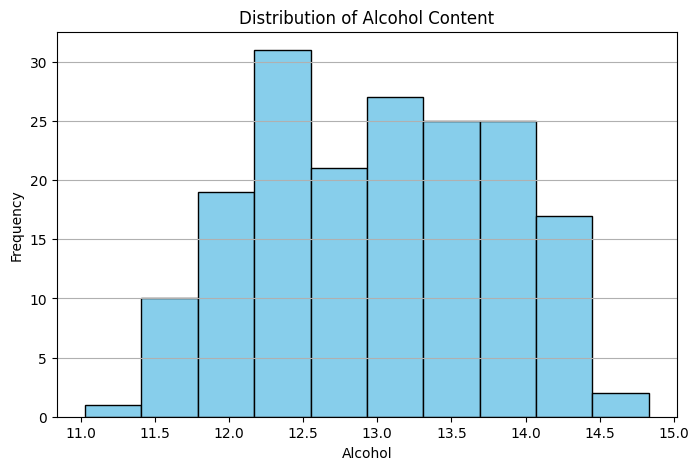

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['Alcohol'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

### Scatter plot of Alcohol vs. Color Intensity

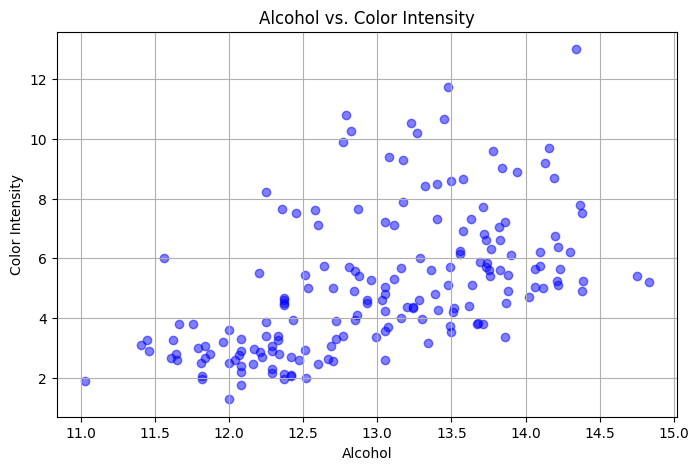

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Alcohol'], df['Color_Intensity'], c='blue', alpha=0.5)
plt.title('Alcohol vs. Color Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.grid(True)
plt.show()

### Heatmap of feature correlations

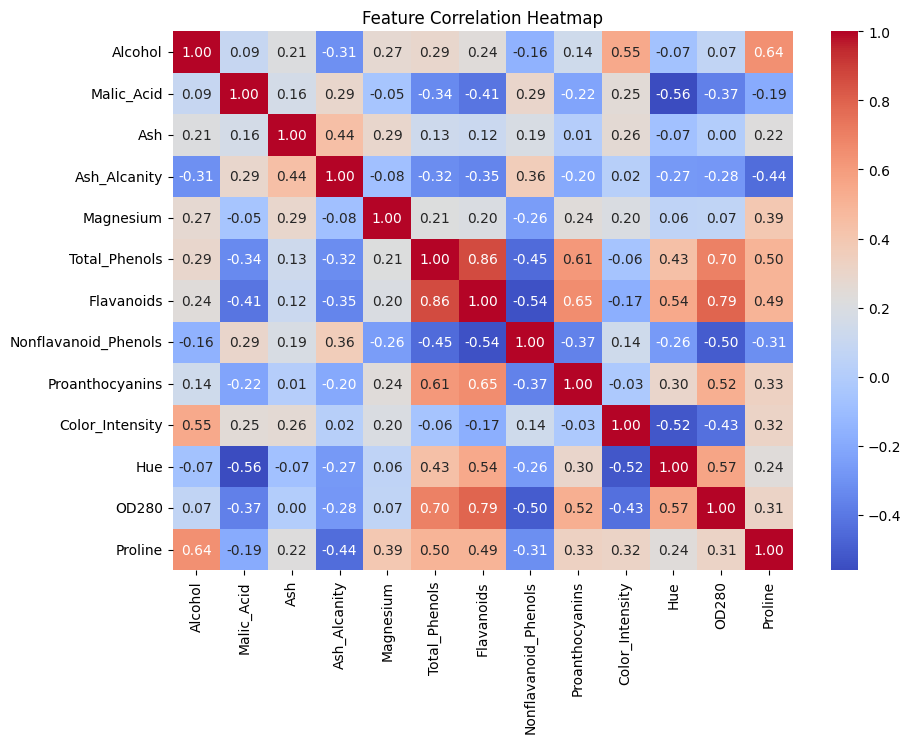

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

### Dimensionality Reduction using PCA

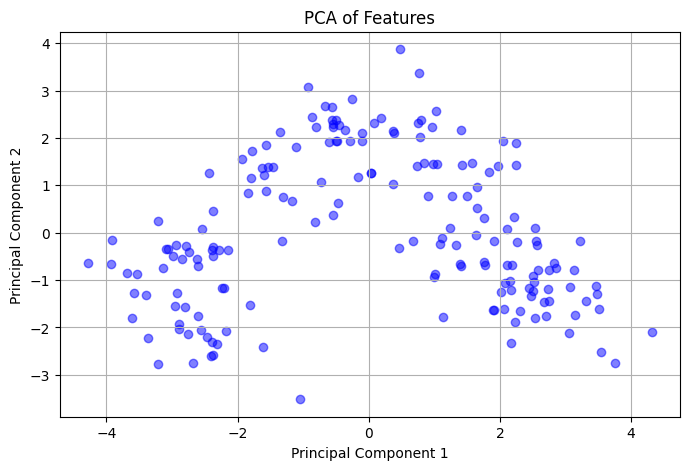

In [11]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c='blue', alpha=0.5)
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### K-means Clustering

In [12]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=RANDOM_SEED)
clusters = kmeans.fit_predict(features_pca)
df['Cluster'] = clusters


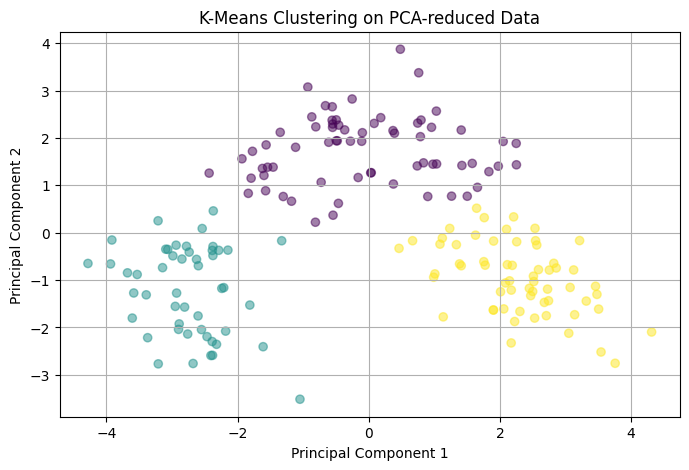

In [13]:
# Clustering Result on PCA-reduced data
plt.figure(figsize=(8, 5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Elbow Plot

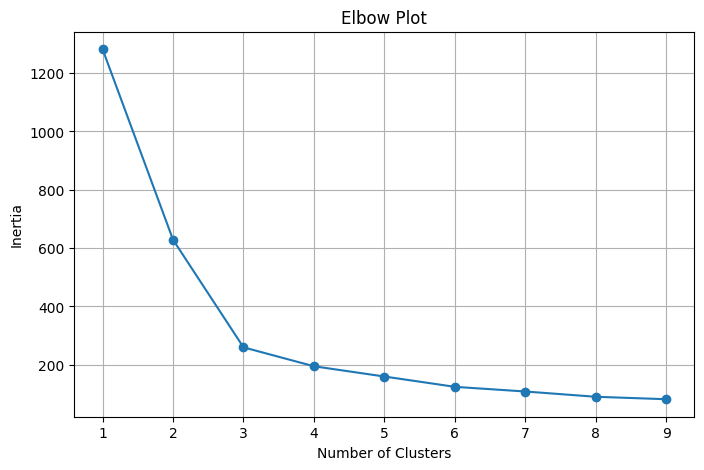

In [14]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, n_init='auto', random_state=RANDOM_SEED)
    km.fit(features_pca)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Silhouette Plot

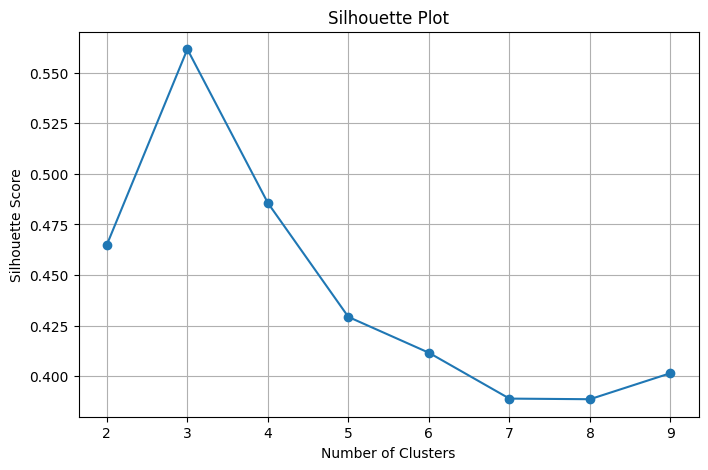

In [15]:
silhouette_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init='auto', random_state=RANDOM_SEED)
    cluster_labels = km.fit_predict(features_pca)
    silhouette_avg = silhouette_score(features_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### Linear Regression Fitting

In [16]:
X = df[['Alcohol']].values
y = df['Color_Intensity'].values
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)


### Line fitting

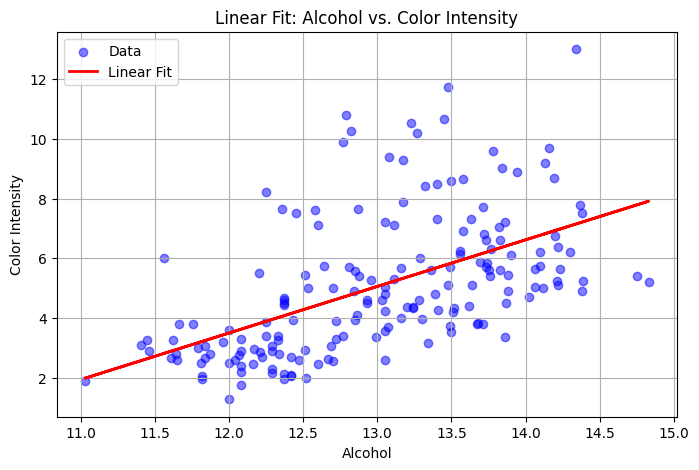

Linear Regression Coefficients: [1.56022048]
Intercept: -15.225740595669553


In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Fit')
plt.title('Linear Fit: Alcohol vs. Color Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend()
plt.grid(True)
plt.show()

df.to_csv('clustered_data.csv', index=False)

print(f'Linear Regression Coefficients: {linear_regressor.coef_}')
print(f'Intercept: {linear_regressor.intercept_}')